In [2]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
import math
from importlib import reload
reload(plt)
%matplotlib notebook

## Линейное уравнение
$$ \frac{\partial u}{\partial t} + a \frac{\partial u}{\partial x} = 0 $$

#### Явная схема
$$ u_i^{j+1} = u_i^j - \frac{a \tau}{h}(u_i^j - u_{i-1}^j) \quad \textrm{при} \quad a > 0$$
$$ u_i^{j+1} = u_i^j - \frac{a \tau}{h}(u_{i+1}^j - u_{i}^j) \quad \textrm{при} \quad a < 0 $$
#### Условие устойчивости
$$ \frac{|a| \tau}{h} < 1 $$

## Уравнение Хопфа
$$ \frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} = 0 $$
#### Явная схема
$$ u_i^{j+1} = u_i^j - \frac{u_i^j \tau}{h}(u_i^j - u_{i-1}^j)$$

## Уравнение неразрывности
$$ \frac{\partial \rho}{\partial t} + \frac{\partial (\rho u)}{\partial x} = 0 $$
#### Явная схема
$$\rho_i^{j+1} = \rho_i^j - \frac{\tau}{h}\bigg{(}u_i^j (\rho_i^j - \rho_{i-1}^j) + \rho_i^j(u_i^j - u_{i-1}^j)\bigg{)}$$

In [5]:
a = 2.0

T = 1
X = 2

tau = 0.01

h1 = abs(a) * tau - 1e-20
h2 = 0.018
h = h1

Nx = math.ceil(2 * X / h) + 1;
Nt = math.ceil(T/ tau) + 1
u0 = []
for x in np.linspace(-X, X, num=Nx):
    if (x <= 0 or x >= 1):
        u0.append(0.0)
    else:
        u0.append(2.0)

def solve_linear(tau, h, T, X, u0, a):
    Nx = math.ceil(2 * X / h) + 1;
    Nt = math.ceil(T / tau) + 1;
    
    u = np.zeros(shape=(Nt, Nx))
    u[0, :] = u0
    
    for j in range(0, Nt - 1):
        if (a > 0):
            for i in range(1, Nx):
                u[j+1][i] = u[j][i] - a * tau / h * (u[j][i] - u[j][i-1])
        else:
            for i in range(0, Nx-1):
                u[j+1][i] = u[j][i] - a * tau / h * (u[j][i+1] - u[j][i])

    return u

def solve_hopf(tau, h, T, X, u0):
    Nx = math.ceil(2 * X / h) + 1;
    Nt = math.ceil(T / tau) + 1;
    
    u = np.zeros(shape=(Nt, Nx))
    u[0, :] = u0
    
    for j in range(0, Nt - 1):
            for i in range(1, Nx):
                u[j+1][i] = u[j][i] - (u[j][i]) * tau / h * (u[j][i] - u[j][i - 1])  
    
    return u

def solve_сontinuity(tau, h, T, X, p0, u):
    Nx = math.ceil(2 * X / h) + 1;
    Nt = math.ceil(T / tau) + 1;
    
    p = np.zeros(shape=(Nt, Nx))
    p[0, :] = p0
        
    for j in range(0, Nt - 1):
        for i in range(1, Nx):
            p[j+1][i] = p[j][i] - tau / h * (u[j][i] * (p[j][i] - p[j][i - 1]) + p[j][i] * (u[j][i]- u[j][i - 1]))
    
    return p

def plot(y, tau, h, title):
    K = y.shape[1]
    N = y.shape[0]
    X1 = np.linspace(-X, X, num=K)
    T = np.array([n * tau for n in np.arange(N)])
    XX, YY = np.meshgrid(X1, T)

    
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.scatter3D(XX, YY, y, c='Red', s=1);
    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.set_zlabel('u')
    ax.set_title(title);

def plot_slices(u, ts, tau, X_space):
    plt.figure()
    for t in ts:
        n = int(t/tau)
        plt.plot(X_space, u[n, :], label='Time: {}'.format(t))
        
    plt.legend(loc='best')
    plt.show()
# continuity u
v = np.zeros(shape=(Nt, Nx))
for i, x in enumerate(np.linspace(-X, X, num=Nx)):
    for j in range(Nt):
        v[j][i] = x

# continuity p0
p0 = []
for x in np.linspace(-X, X, num=Nx):
    if (x <= 0 or x >= 1):
        p0.append(0.0)
    else:
        p0.append(1.0)

X_space = np.linspace(-X, X, num=Nx)

<IPython.core.display.Javascript object>


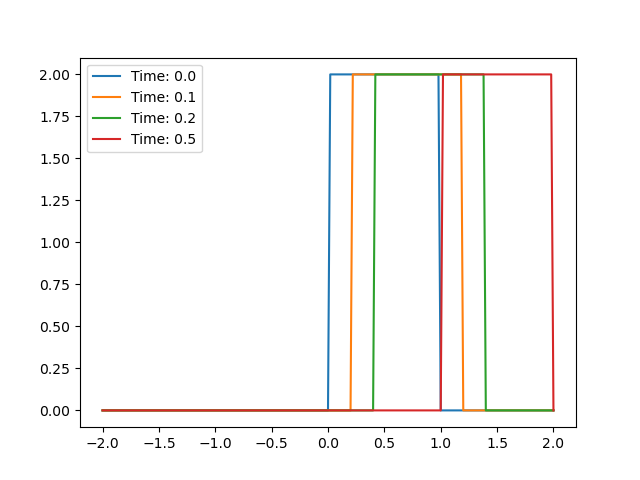

<IPython.core.display.Javascript object>


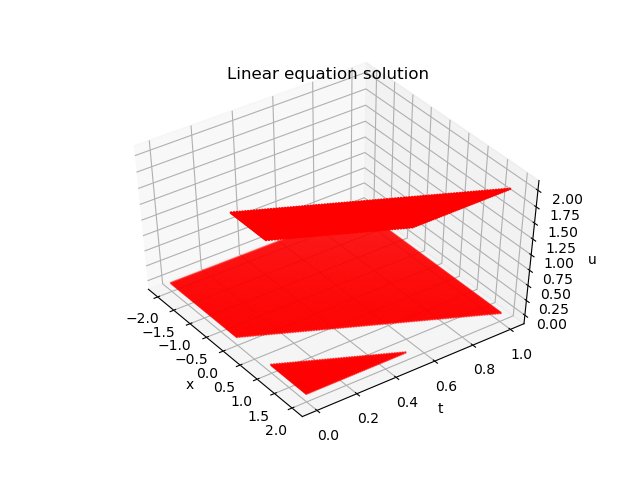

In [6]:
u = solve_linear(tau, h, T, X, u0, a)
plot_slices(u, [0.0, 0.1, 0.2, 0.5], tau, X_space)
plot(u, tau, h, "Linear equation solution")

<IPython.core.display.Javascript object>


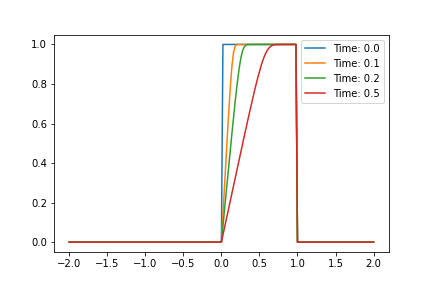

<IPython.core.display.Javascript object>


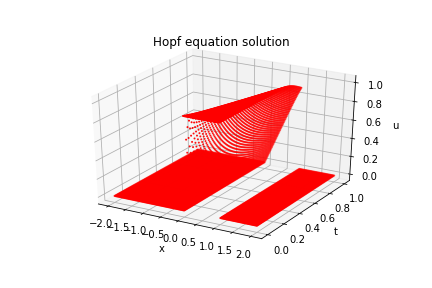

In [139]:
u = solve_hopf(tau, h, T, X, u0)
plot_slices(u, [0.0, 0.1, 0.2, 0.5], tau, X_space)
plot(u, tau, h, "Hopf equation solution")

<IPython.core.display.Javascript object>


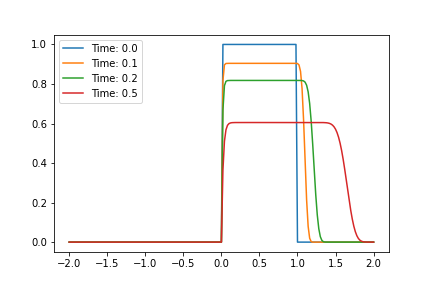

<IPython.core.display.Javascript object>


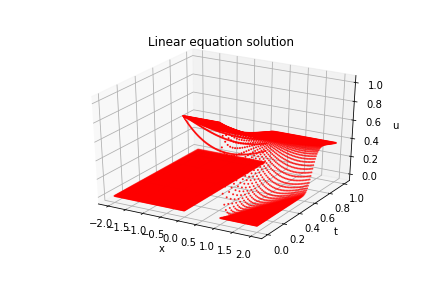

In [140]:
y = solve_сontinuity(tau, h, T, X, p0, v)
plot_slices(y, [0.0, 0.1, 0.2, 0.5], tau, X_space)
plot(y, tau, h, "Linear equation solution")